# Análise Exploratória dos Dados

In [40]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [41]:
caminho_arquivo = Path(r'C:\Users\alexa\OneDrive\Área de Trabalho\projeto_a3\dados_tratados\obesity_cleaned2.csv')

In [42]:
dados = pd.read_csv(caminho_arquivo)
del dados['Unnamed: 0']
dados


,Country,Year,Obesity (%),Sex,Region
0,Afghanistan,2016,5.5 [3.4-8.1],Both Sexes,Other
1,Afghanistan,2016,3.2 [1.3-6.4],Male,Other
2,Afghanistan,2016,7.6 [4.3-12.4],Female,Other
3,Afghanistan,2015,5.2 [3.3-7.7],Both Sexes,Other
4,Afghanistan,2015,3.0 [1.3-6.0],Male,Other
...,...,...,...,...,...
24565,Zimbabwe,1976,0.5 [0.1-1.3],Male,Other
24566,Zimbabwe,1976,7.0 [3.3-12.4],Female,Other
24567,Zimbabwe,1975,3.7 [1.7-6.5],Both Sexes,Other
24568,Zimbabwe,1975,0.4 [0.1-1.3],Male,Other


### Os dados entre homens e mulheres são parecidos? Informe com números.

In [43]:
dados.dtypes

Country        object
Year            int64
Obesity (%)    object
Sex            object
Region         object
dtype: object

In [44]:
dados['Obesity_mean'] = dados['Obesity (%)'].str.split('[').str[0]

In [45]:
dados.dtypes

Country         object
Year             int64
Obesity (%)     object
Sex             object
Region          object
Obesity_mean    object
dtype: object

In [46]:
dados.Country

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
24565       Zimbabwe
24566       Zimbabwe
24567       Zimbabwe
24568       Zimbabwe
24569       Zimbabwe
Name: Country, Length: 24570, dtype: object

In [47]:
dados['Obesity_mean'] = pd.to_numeric(dados['Obesity_mean'], errors='coerce')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       24570 non-null  object 
 1   Year          24570 non-null  int64  
 2   Obesity (%)   24570 non-null  object 
 3   Sex           24570 non-null  object 
 4   Region        24570 non-null  object 
 5   Obesity_mean  24066 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ MB


In [48]:
dados.head()

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
0,Afghanistan,2016,5.5 [3.4-8.1],Both Sexes,Other,5.5
1,Afghanistan,2016,3.2 [1.3-6.4],Male,Other,3.2
2,Afghanistan,2016,7.6 [4.3-12.4],Female,Other,7.6
3,Afghanistan,2015,5.2 [3.3-7.7],Both Sexes,Other,5.2
4,Afghanistan,2015,3.0 [1.3-6.0],Male,Other,3.0


In [49]:
media_homens_br = dados[dados['Sex'] == 'Male']
media_homens_br = media_homens_br['Obesity_mean'].mean()
media_homens_br

9.332984293193716

A média de obesidade mundial dos homens é de 9.33%

In [50]:
media_mulheres = dados[dados['Sex'] == 'Female']
media_mulheres = media_mulheres['Obesity_mean'].mean()
media_mulheres

15.533433059087509

A média de obesidade mundial das mulheres é de 15.53%

In [51]:
amplitude_homens_mulheres = media_mulheres - media_homens_br
amplitude_homens_mulheres

6.200448765893793

A diferença do percetual de pessoas obesas entre homens e mulheres é de 6.20%, ou seja, as mulheres tem maior tendência em serem obesas do que os homens.

### Qual o percentual médio de obesidade por sexo na América do Norte no ano de 2010

In [52]:
america_do_norte_2010 = dados[(dados['Region'] == 'North America') & (dados['Year'] == 2010)]
america_do_norte_2010

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
3924,Canada,2010,26.0 [23.2-28.9],Both Sexes,North America,26.0
3925,Canada,2010,25.8 [21.8-30.1],Male,North America,25.8
3926,Canada,2010,26.2 [22.4-30.2],Female,North America,26.2
13878,Mexico,2010,25.8 [23.1-28.6],Both Sexes,North America,25.8
13879,Mexico,2010,21.1 [17.5-25.0],Male,North America,21.1
13880,Mexico,2010,29.8 [25.8-33.9],Female,North America,29.8
23454,United States of America,2010,32.3 [29.6-35.1],Both Sexes,North America,32.3
23455,United States of America,2010,31.2 [27.4-35.3],Male,North America,31.2
23456,United States of America,2010,33.3 [29.6-37.1],Female,North America,33.3


In [53]:
media_homens_na = america_do_norte_2010[america_do_norte_2010['Sex'] == 'Male']
media_homens_na.Obesity_mean.mean()

26.033333333333335

A média do percentual de pessoas do sexo masculino na América do norte no ano de 2010 é de 26.03%

In [54]:
media_mulheres_na = america_do_norte_2010[america_do_norte_2010['Sex'] == 'Female']
media_mulheres_na.Obesity_mean.mean()

29.766666666666666

A média do percentual de pessoas do sexo masculino na América do norte no ano de 2010 é de 29.77%

### Qual os top 3 com maior e menor taxa de aumento de índices de obesidade nesse período de 2010? E em 2016?

In [55]:
dados

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
0,Afghanistan,2016,5.5 [3.4-8.1],Both Sexes,Other,5.5
1,Afghanistan,2016,3.2 [1.3-6.4],Male,Other,3.2
2,Afghanistan,2016,7.6 [4.3-12.4],Female,Other,7.6
3,Afghanistan,2015,5.2 [3.3-7.7],Both Sexes,Other,5.2
4,Afghanistan,2015,3.0 [1.3-6.0],Male,Other,3.0
...,...,...,...,...,...,...
24565,Zimbabwe,1976,0.5 [0.1-1.3],Male,Other,0.5
24566,Zimbabwe,1976,7.0 [3.3-12.4],Female,Other,7.0
24567,Zimbabwe,1975,3.7 [1.7-6.5],Both Sexes,Other,3.7
24568,Zimbabwe,1975,0.4 [0.1-1.3],Male,Other,0.4


In [56]:
paises_1975_dois_sexos = dados[(dados['Sex'] == 'Both Sexes') & (dados['Year'] == 1975)]
paises_1975_dois_sexos


,Country,Year,Obesity (%),Sex,Region,Obesity_mean
123,Afghanistan,1975,0.5 [0.2-1.1],Both Sexes,Other,0.5
249,Albania,1975,6.5 [3.6-10.5],Both Sexes,Other,6.5
375,Algeria,1975,6.9 [3.9-10.9],Both Sexes,Other,6.9
501,Andorra,1975,12.9 [8.6-18.1],Both Sexes,Other,12.9
627,Angola,1975,0.8 [0.3-1.9],Both Sexes,Other,0.8
...,...,...,...,...,...,...
24063,Venezuela (Bolivarian Republic of),1975,9.6 [5.9-14.1],Both Sexes,Other,9.6
24189,Viet Nam,1975,0.1 [0.0-0.3],Both Sexes,Other,0.1
24315,Yemen,1975,2.8 [1.3-5.4],Both Sexes,Other,2.8
24441,Zambia,1975,1.5 [0.7-3.0],Both Sexes,Other,1.5


In [57]:
paises_2010_dois_sexos = dados[(dados['Sex'] == 'Both Sexes') & (dados['Year'] == 2010)]
paises_2010_dois_sexos

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
18,Afghanistan,2010,4.0 [2.5-5.9],Both Sexes,Other,4.0
144,Albania,2010,18.2 [14.3-22.3],Both Sexes,Other,18.2
270,Algeria,2010,23.3 [19.3-27.6],Both Sexes,Other,23.3
396,Andorra,2010,24.4 [19.7-29.5],Both Sexes,Other,24.4
522,Angola,2010,6.2 [3.8-9.2],Both Sexes,Other,6.2
...,...,...,...,...,...,...
23958,Venezuela (Bolivarian Republic of),2010,23.3 [19.7-27.1],Both Sexes,Other,23.3
24084,Viet Nam,2010,1.4 [0.9-1.9],Both Sexes,Other,1.4
24210,Yemen,2010,13.5 [10.6-16.7],Both Sexes,Other,13.5
24336,Zambia,2010,6.3 [4.6-8.2],Both Sexes,Other,6.3


In [58]:
df_taxa = paises_2010_dois_sexos[['Country', 'Obesity_mean']]
df_taxa.rename(columns={"Obesity_mean":"Obesity_2010"}, inplace=True)
df_taxa

C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\2942407590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa.rename(columns={"Obesity_mean":"Obesity_2010"}, inplace=True)


,Country,Obesity_2010
18,Afghanistan,4.0
144,Albania,18.2
270,Algeria,23.3
396,Andorra,24.4
522,Angola,6.2
...,...,...
23958,Venezuela (Bolivarian Republic of),23.3
24084,Viet Nam,1.4
24210,Yemen,13.5
24336,Zambia,6.3


In [59]:
df_taxa['Obesity_1975'] = paises_1975_dois_sexos[['Obesity_mean']]
df_taxa


C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\239154478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa['Obesity_1975'] = paises_1975_dois_sexos[['Obesity_mean']]


,Country,Obesity_2010,Obesity_1975
18,Afghanistan,4.0,NaN
144,Albania,18.2,NaN
270,Algeria,23.3,NaN
396,Andorra,24.4,NaN
522,Angola,6.2,NaN
...,...,...,...
23958,Venezuela (Bolivarian Republic of),23.3,NaN
24084,Viet Nam,1.4,NaN
24210,Yemen,13.5,NaN
24336,Zambia,6.3,NaN


In [60]:
df_taxa

,Country,Obesity_2010,Obesity_1975
18,Afghanistan,4.0,NaN
144,Albania,18.2,NaN
270,Algeria,23.3,NaN
396,Andorra,24.4,NaN
522,Angola,6.2,NaN
...,...,...,...
23958,Venezuela (Bolivarian Republic of),23.3,NaN
24084,Viet Nam,1.4,NaN
24210,Yemen,13.5,NaN
24336,Zambia,6.3,NaN


In [61]:
lista_obesidade_1975 = list(paises_1975_dois_sexos['Obesity_mean'])


In [62]:
df_taxa['Obesity_1975'] = lista_obesidade_1975

C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\3569600128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa['Obesity_1975'] = lista_obesidade_1975


In [63]:
df_taxa['Taxa_aumento_%'] = ((df_taxa['Obesity_2010'] - df_taxa['Obesity_1975']) / df_taxa['Obesity_1975']) * 100
df_taxa

C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\2342464556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa['Taxa_aumento_%'] = ((df_taxa['Obesity_2010'] - df_taxa['Obesity_1975']) / df_taxa['Obesity_1975']) * 100


,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%
18,Afghanistan,4.0,0.5,700.000000
144,Albania,18.2,6.5,180.000000
270,Algeria,23.3,6.9,237.681159
396,Andorra,24.4,12.9,89.147287
522,Angola,6.2,0.8,675.000000
...,...,...,...,...
23958,Venezuela (Bolivarian Republic of),23.3,9.6,142.708333
24084,Viet Nam,1.4,0.1,1300.000000
24210,Yemen,13.5,2.8,382.142857
24336,Zambia,6.3,1.5,320.000000


In [64]:
df_taxa.sort_values('Taxa_aumento_%', ascending=True, inplace=True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\3853848381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa.sort_values('Taxa_aumento_%', ascending=True, inplace=True)


Os países Top 3 que tiveram a maior taxa de crescimento do percentual de obesidade, considerando de 1975 até foi:

In [65]:
df_taxa.iloc[:3]

,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%
15012,Nauru,58.9,44.5,32.359551
18036,Russian Federation,21.4,13.9,53.956835
7200,Estonia,19.6,12.7,54.330709


In [66]:
df_taxa.sort_values('Taxa_aumento_%', ascending=True, inplace=True)
df_taxa

C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\2509507454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa.sort_values('Taxa_aumento_%', ascending=True, inplace=True)


,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%
15012,Nauru,58.9,44.5,32.359551
18036,Russian Federation,21.4,13.9,53.956835
7200,Estonia,19.6,12.7,54.330709
11862,Latvia,21.8,13.4,62.686567
13374,Malta,26.8,15.6,71.794872
...,...,...,...,...
24084,Viet Nam,1.4,0.1,1300.000000
14130,Monaco,NaN,NaN,NaN
18792,San Marino,NaN,NaN,NaN
20430,South Sudan,NaN,NaN,NaN


Os países Top 3 que tiveram a menor taxa de crescimento do percentual de obesidade, considerando de 1975 até 2010 foi:

In [67]:
df_taxa.iloc[:3]

,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%
15012,Nauru,58.9,44.5,32.359551
18036,Russian Federation,21.4,13.9,53.956835
7200,Estonia,19.6,12.7,54.330709


In [68]:
df_taxa

,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%
15012,Nauru,58.9,44.5,32.359551
18036,Russian Federation,21.4,13.9,53.956835
7200,Estonia,19.6,12.7,54.330709
11862,Latvia,21.8,13.4,62.686567
13374,Malta,26.8,15.6,71.794872
...,...,...,...,...
24084,Viet Nam,1.4,0.1,1300.000000
14130,Monaco,NaN,NaN,NaN
18792,San Marino,NaN,NaN,NaN
20430,South Sudan,NaN,NaN,NaN


In [69]:
paises_2016_dois_sexos = dados[(dados['Sex'] == 'Both Sexes') & (dados['Year'] == 2016)]
paises_2016_dois_sexos
lista_obesidade_2016 = list(paises_2016_dois_sexos['Obesity_mean'])

In [70]:
df_taxa['Obesity_2016'] = lista_obesidade_2016

C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\2842931843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa['Obesity_2016'] = lista_obesidade_2016


In [71]:
df_taxa

,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%,Obesity_2016
15012,Nauru,58.9,44.5,32.359551,5.5
18036,Russian Federation,21.4,13.9,53.956835,21.7
7200,Estonia,19.6,12.7,54.330709,27.4
11862,Latvia,21.8,13.4,62.686567,25.6
13374,Malta,26.8,15.6,71.794872,8.2
...,...,...,...,...,...
24084,Viet Nam,1.4,0.1,1300.000000,25.6
14130,Monaco,NaN,NaN,NaN,2.1
18792,San Marino,NaN,NaN,NaN,17.1
20430,South Sudan,NaN,NaN,NaN,8.1


In [72]:
df_taxa2 = paises_1975_dois_sexos[['Country']]
df_taxa2['Obesity_2010'] = paises_2010_dois_sexos['Obesity_mean']
lista_obesidade_2010 = list(paises_2010_dois_sexos['Obesity_mean'])
df_taxa2['Obesity_2010'] = lista_obesidade_2010
df_taxa2['Obesity_2016'] = lista_obesidade_2016
df_taxa2['Taxa_aumento_%'] = ((df_taxa2['Obesity_2016'] - df_taxa2['Obesity_2010']) / df_taxa2['Obesity_2010']) * 100
df_taxa2.sort_values('Taxa_aumento_%', ascending=False, inplace=True)
df_taxa2

C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\852090251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa2['Obesity_2010'] = paises_2010_dois_sexos['Obesity_mean']
C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\852090251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa2['Obesity_2010'] = lista_obesidade_2010
C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\852090251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Country,Obesity_2010,Obesity_2016,Taxa_aumento_%
11841,Lao People's Democratic Republic,3.5,5.3,51.428571
24189,Viet Nam,1.4,2.1,50.000000
21921,Timor-Leste,2.6,3.8,46.153846
13227,Maldives,5.9,8.6,45.762712
14865,Myanmar,4.0,5.8,45.000000
...,...,...,...,...
15117,Nauru,58.9,61.0,3.565365
14235,Monaco,NaN,NaN,NaN
18897,San Marino,NaN,NaN,NaN
20535,South Sudan,NaN,NaN,NaN


In [73]:
df_taxa2.iloc[:3]

,Country,Obesity_2010,Obesity_2016,Taxa_aumento_%
11841,Lao People's Democratic Republic,3.5,5.3,51.428571
24189,Viet Nam,1.4,2.1,50.000000
21921,Timor-Leste,2.6,3.8,46.153846


De 2010 para 2016 o país que teve uma maior taxa de crescimento no índice de obesidade foi: Lao People's Democratic Republic, Viet Nam e Timor-Leste	

In [74]:
df_taxa2.sort_values('Taxa_aumento_%', ascending=True, inplace=True)
df_taxa2.iloc[:3]

C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\1434962010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa2.sort_values('Taxa_aumento_%', ascending=True, inplace=True)


,Country,Obesity_2010,Obesity_2016,Taxa_aumento_%
15117,Nauru,58.9,61.0,3.565365
501,Andorra,24.4,25.6,4.918033
5037,Cook Islands,52.6,55.9,6.273764


Entre 2010 e 2016, os países que tiveram as menores taxas de crescimento de obesidade foram: Nauru, Andorra, Cook Islands

In [75]:
df_taxa3= paises_1975_dois_sexos[['Country']]
df_taxa3['Obesity_1975'] = paises_1975_dois_sexos['Obesity_mean']
lista_obesidade_1975 = list(paises_1975_dois_sexos['Obesity_mean'])
df_taxa3['Obesity_2016'] = lista_obesidade_2016
df_taxa3['Taxa_aumento_%'] = ((df_taxa3['Obesity_2016'] - df_taxa3['Obesity_1975']) / df_taxa3['Obesity_1975']) * 100
df_taxa3.sort_values('Taxa_aumento_%', ascending=False, inplace=True)
df_taxa3.iloc[:3]

C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\2385176967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa3['Obesity_1975'] = paises_1975_dois_sexos['Obesity_mean']
C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\2385176967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa3['Obesity_2016'] = lista_obesidade_2016
C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\2385176967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Country,Obesity_1975,Obesity_2016,Taxa_aumento_%
24189,Viet Nam,0.1,2.1,2000.0
21921,Timor-Leste,0.2,3.8,1800.0
1761,Bangladesh,0.2,3.6,1700.0


Os 3 países que tiveram a maior taxa de crescimento de pessoas obesas foram: Viet Nam, Timor-Leste e Bangladesh

In [76]:
df_taxa3.sort_values('Taxa_aumento_%', ascending=True, inplace=True)
df_taxa3.iloc[:3]

C:\Users\alexa\AppData\Local\Temp\ipykernel_15756\3611991547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa3.sort_values('Taxa_aumento_%', ascending=True, inplace=True)


,Country,Obesity_1975,Obesity_2016,Taxa_aumento_%
15117,Nauru,44.5,61.0,37.078652
18141,Russian Federation,13.9,23.1,66.187050
7305,Estonia,12.7,21.2,66.929134


Os países que tiveram a menor taxa de crescimento de pessoas obesas foram: Nauru, Russian Federation, Estonia.

# Análise do Brasil

In [77]:
dados_brasil = dados[dados['Country'] == 'Brazil']
dados_brasil


,Country,Year,Obesity (%),Sex,Region,Obesity_mean
2898,Brazil,2016,22.1 [18.7-25.7],Both Sexes,Other,22.1
2899,Brazil,2016,18.5 [14.1-23.5],Male,Other,18.5
2900,Brazil,2016,25.4 [20.4-30.7],Female,Other,25.4
2901,Brazil,2015,21.6 [18.4-25.0],Both Sexes,Other,21.6
2902,Brazil,2015,18.0 [13.9-22.6],Male,Other,18.0
...,...,...,...,...,...,...
3019,Brazil,1976,3.2 [1.5-5.8],Male,Other,3.2
3020,Brazil,1976,7.6 [4.3-12.2],Female,Other,7.6
3021,Brazil,1975,5.2 [3.3-7.9],Both Sexes,Other,5.2
3022,Brazil,1975,3.0 [1.4-5.7],Male,Other,3.0


### Qual a média do percetual de obesidade histórica de homens e mulheres no Brasil? Considerando todos os anos disponíveis no dataset

In [78]:
media_homens_br = dados_brasil[dados_brasil['Sex'] == 'Male']
media_homens_br = media_homens_br['Obesity_mean'].mean()
media_homens_br

9.67142857142857

In [80]:
media_mulheres_br = dados_brasil[dados_brasil['Sex'] == 'Female']
media_mulheres_br = media_mulheres_br['Obesity_mean'].mean()
media_mulheres_br

15.849999999999998

No histórico do Brasil, a média de percentual de homens obesos é de 9,67%, enquanto a média das mulheres é de 15,85%. Fica evidente que a tendência das mulheres acumularem mais gorduta é uma tendência mundial e não só brasileira

### 

### Qual foi a taxa de crescimento do Brasil, considerando 1975 até 2016 dos dois sexos? 

In [81]:
dados_brasil

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
2898,Brazil,2016,22.1 [18.7-25.7],Both Sexes,Other,22.1
2899,Brazil,2016,18.5 [14.1-23.5],Male,Other,18.5
2900,Brazil,2016,25.4 [20.4-30.7],Female,Other,25.4
2901,Brazil,2015,21.6 [18.4-25.0],Both Sexes,Other,21.6
2902,Brazil,2015,18.0 [13.9-22.6],Male,Other,18.0
...,...,...,...,...,...,...
3019,Brazil,1976,3.2 [1.5-5.8],Male,Other,3.2
3020,Brazil,1976,7.6 [4.3-12.2],Female,Other,7.6
3021,Brazil,1975,5.2 [3.3-7.9],Both Sexes,Other,5.2
3022,Brazil,1975,3.0 [1.4-5.7],Male,Other,3.0


In [84]:
lista_obesidade_1975_brasil = []
dados_brasil_dois_sexos = dados_brasil[dados_brasil['Sex'] == 'Both Sexes']
dados_brasil_dois_sexos

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
2898,Brazil,2016,22.1 [18.7-25.7],Both Sexes,Other,22.1
2901,Brazil,2015,21.6 [18.4-25.0],Both Sexes,Other,21.6
2904,Brazil,2014,21.1 [18.1-24.2],Both Sexes,Other,21.1
2907,Brazil,2013,20.6 [17.8-23.5],Both Sexes,Other,20.6
2910,Brazil,2012,20.1 [17.4-22.8],Both Sexes,Other,20.1
2913,Brazil,2011,19.6 [17.1-22.2],Both Sexes,Other,19.6
2916,Brazil,2010,19.2 [16.8-21.6],Both Sexes,Other,19.2
2919,Brazil,2009,18.7 [16.4-21.1],Both Sexes,Other,18.7
2922,Brazil,2008,18.2 [16.0-20.5],Both Sexes,Other,18.2
2925,Brazil,2007,17.8 [15.6-20.0],Both Sexes,Other,17.8


In [91]:
lista_anos_brasil_dois_sexos = list(dados_brasil_dois_sexos['Year'])
lista_obesidade_brasil_dois_sexos = list(dados_brasil_dois_sexos['Obesity_mean'])


In [97]:
data_dict = {'Ano': lista_anos_brasil_dois_sexos, 'Media_Obesidade': lista_obesidade_brasil_dois_sexos}
dados_gráfico_linha = pd.DataFrame(data_dict)
dados_gráfico_linha.sort_values('Ano', ascending=True, inplace=True)
dados_gráfico_linha

,Ano,Media_Obesidade
41,1975,5.2
40,1976,5.5
39,1977,5.7
38,1978,6.0
37,1979,6.3
36,1980,6.6
35,1981,6.9
34,1982,7.2
33,1983,7.6
32,1984,7.9


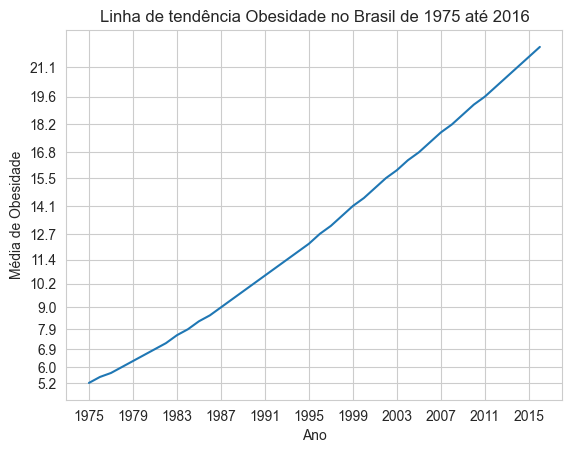

In [110]:
sns.set_style('whitegrid')
sns.lineplot(data=dados_gráfico_linha, x='Ano', y='Media_Obesidade')
plt.xlabel('Ano')
plt.xticks(dados_gráfico_linha['Ano'][::4])
plt.ylabel('Média de Obesidade')
plt.yticks(dados_gráfico_linha['Media_Obesidade'][::3])
plt.title('Linha de tendência Obesidade no Brasil de 1975 até 2016')
plt.show()